In [84]:
import pandas as pd
from vega import VegaLite 
import math


In [94]:
movies = pd.read_csv("output/nodes.csv")
movies.head()
# movies_of_1950 = movies[(movies['year'] == 1950) & (movies['type'] == 'MOVIE')]
 
genres_pd = pd.DataFrame(movies, columns = ['genre' , 'genre_label']) 
genres_pd = genres_pd.dropna() 

In [115]:
genre_dict = {}
for index, row in genres_pd.iterrows():
    splittedGenres = row['genre'].split(",")    
    splittedGenreLables = row['genre_label'].split(",")
 
    for index, genre in enumerate(splittedGenres): 
        genre = genre.strip()
        if genre in genre_dict:
            genre_dict[genre]['count'] += 1
        else: 
            genre_dict[genre] = { 'label': splittedGenreLables[index].strip(), 'count': 1  }
    

genres = pd.DataFrame.from_dict(genre_dict, orient='index')
genres.to_csv('output/genres.csv', index=True, index_label='ID', encoding='utf-8')
genres.describe()


,count
count,112.000000
mean,22.964286
std,68.304423
min,1.000000
25%,1.000000
50%,4.000000
75%,11.000000
max,640.000000


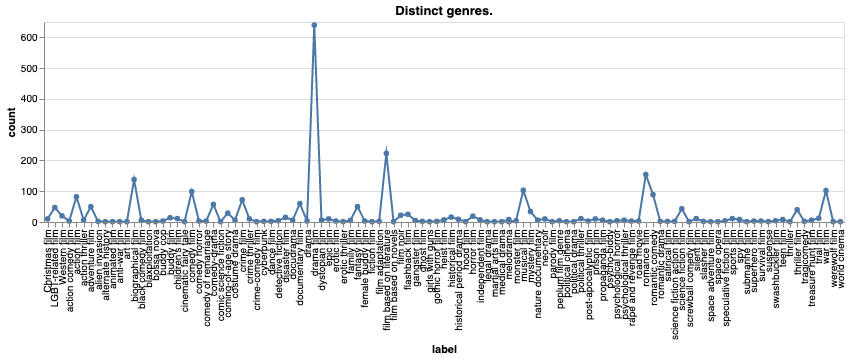

In [123]:
VegaLite({
    "data": {
        "url": "output/genres.csv"
    },
    "title": "Distinct genres.",
    "width": 800,
    "mark": {
         "type": "line",
        "point": True
      },
     
    "encoding": {
        "x": {
            "field": "label",
            "type": "nominal"
        },
        "y": {
            "field": "count",
            "type": "quantitative"
        }
    }
})

In [137]:
top_genres = genres[genres['count'] > 10]
top_genres.to_csv('output/top_genres.csv', index=True, index_label='ID', encoding='utf-8')

top_genres.describe()


,count
count,31.000000
mean,74.161290
std,116.177191
min,11.000000
25%,17.500000
50%,43.000000
75%,85.500000
max,640.000000


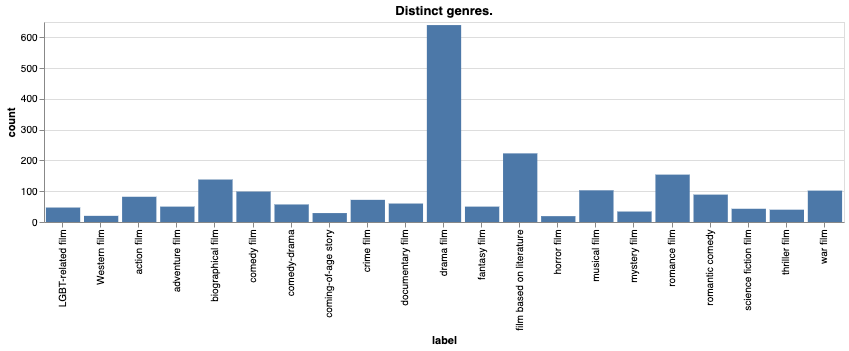

In [134]:
VegaLite({
    "data": {
        "url": "output/top_genres.csv"
    },
    "title": "Distinct genres.",
    "width": 800,
    "mark": {
         "type": "bar",
        "point": True
      },
     
    "encoding": {
        "x": {
            "field": "label",
            "type": "nominal"
        },
        "y": {
            "field": "count",
            "type": "quantitative"
        }
    }
})

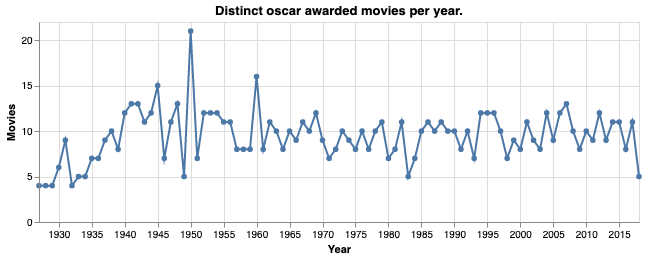

In [43]:
VegaLite({
    "data": {
        "url": "output/nodes.csv"
    },
    "title": "Distinct oscar awarded movies per year.",
    "width": 600,
    "mark": {
         "type": "line",
        "point": True
      },
    "transform": [ 
        {"filter": {"field": "type", "equal": "MOVIE"}}
    ],
    "encoding": {
        "x": {
            "field": "year",
            "type": "temporal",
            "axis": {"title": "Year"}
        },
        "y": {
            "aggregate": "count",
            # <= Zählen Sie die Einträge
            "field": "type",
            "type": "quantitative",
            "axis": {"title": "Movies"}
        }
    }
})

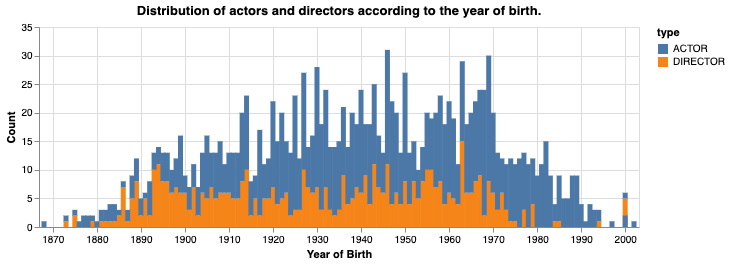

In [44]:
VegaLite({
    "data": {
        "url": "output/nodes.csv"
    },
    "title": "Distribution of actors and directors according to the year of birth.",
    "width": 600,
    "mark": {
         "type": "bar",
        
      },
    "transform": [ 
        {"filter": {"field": "type", "oneOf": ["ACTOR", "DIRECTOR"]}}
    ],
    "encoding": {
        "x": {
            "field": "year",
            "type": "temporal",
            "axis": {"title": "Year of Birth"}
        },
        "y": {
            "aggregate": "count",
            # <= Zählen Sie die Einträge
            "field": "type",
            "type": "quantitative",
            "axis": {"title": "Count"}
        },
        "color": { "field": "type", "type": "nominal"}
    }
})

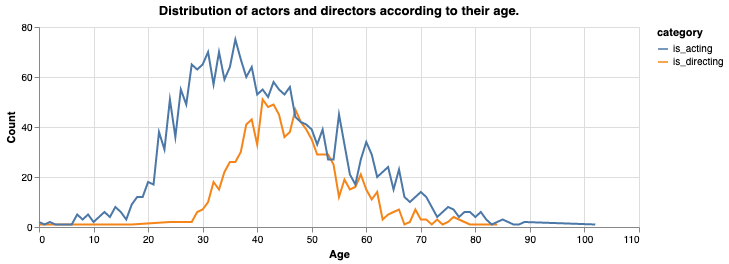

In [49]:
VegaLite({
    "data": {
        "url": "output/edges.csv"
    },
    "title": "Distribution of actors and directors according to their age.",
    "width": 600,
    "mark": {
         "type": "line",
        
      },
    "encoding": {
        "x": {
            "field": "age",
             "axis": {"title": "Age"}
        },
        "y": {
            "aggregate": "count",
            "field": "type",
            "type": "quantitative",
            "axis": {"title": "Count"}
        },
        "color": { "field": "category", "type": "nominal"}
    }
})